In [1]:
from typing import Union

import numpy as np
import matplotlib.pyplot as plt


In [2]:
def plot_array(arr, title=""):
    """Plot 2D array with colorbar."""

    fig = plt.figure(figsize=(8, 5))

    ax = fig.add_subplot(111)
    ax.set_title(title)

    plt.imshow(arr)

    ax.set_aspect('equal')

    cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])

    cax.get_xaxis().set_visible(False)
    cax.get_yaxis().set_visible(False)
    cax.patch.set_alpha(0)
    cax.set_frame_on(False)

    plt.show()


In [3]:
def buffer_flat_array(target_index: int, 
                      arr: np.ndarray, 
                      nrows: int, 
                      ncols: int, 
                      ncells: int, 
                      set_value: Union[int, float]):
    """Assign a value to the neighboring elements of a 1D array as if they
    were in 2D space. The number of neighbors are based on the `ncells` argument
    which is used to define the window around the target cell to be altered as
    if they were in 2D space.

    :param target_index:                Index of the target element in the 1D array
    :type target_index:                 int

    :param arr:                         A 1D array that has been flattened from a corresponding 2D array
    :type arr:                          ndarray

    :param nrows:                       The number of rows in the parent 2D array
    :type nrows:                        int

    :param ncols:                       The number of columns in the parent 2D array
    :type ncols:                        int

    :param ncells:                      The number of cells for the buffer extending as a radius
    :type ncells:                       int

    :param set_value:                   The value to set for the selected buffer
    :type set_value:                    int; float

    :return:                            [0] Modified 1D array
                                        [1] list of buffered indices

    """
    
    # list to hold buffer indices for the target grid cell
    buffer_indices = []

    # calculate the number of elements in the 2D grid space
    ngrids = nrows * ncols

    # ensure that the target index is in the grid space
    if 0 <= target_index < ngrids:

        # target cell index bounds for the row
        min_idx = target_index - ncells
        max_idx = target_index + ncells + 1

        # create target row limits
        end_row_idx = target_index + ncols - np.mod(target_index, ncols) - 1
        start_row_idx = end_row_idx - (ncols - 1)

        # do not let the index bleed past the row
        if max_idx > end_row_idx:
            max_idx = end_row_idx + 1

        # do not let the index go negative
        if min_idx < start_row_idx:
            min_idx = start_row_idx

        # initialize above
        min_above = min_idx - ncols
        max_above = max_idx - ncols

        # initialize below
        min_below = min_idx + ncols
        max_below = max_idx + ncols

        # target row assignment
        arr[min_idx: max_idx] = set_value

        # add indices to buffer list
        buffer_indices.extend(list(range(min_idx, max_idx)))

        for _ in range(ncells):

            # above
            if min_above >= 0 and max_above >= 0 and start_row_idx < ngrids:
                arr[min_above: max_above] = set_value

                # add indices to buffer list
                buffer_indices.extend(list(range(min_above, max_above)))

            # advance above to the next row
            min_above -= ncols
            max_above -= ncols

            # below
            if min_below <= ngrids and max_below <= ngrids:
                arr[min_below: max_below] = set_value

                # add indices to buffer list
                buffer_indices.extend(list(range(min_below, max_below)))

            # advance below to the next row
            min_below += ncols
            max_below += ncols

    else:
        raise IndexError(f"Index: '{target_index}' is not in the range of the grid space from 0 to {ngrids - 1}.")

    return arr, buffer_indices


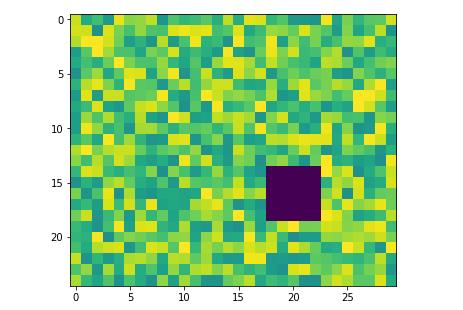

In [4]:
# create a random array for testing
arx = np.random.rand(25, 30)

# buffer 1D array
arx_flat, l = buffer_flat_array(target_index=500,
                          arr=arx.flatten(),
                          nrows=arx.shape[0],
                          ncols=arx.shape[1],
                          ncells=2,
                          set_value=-1)

plot_array(arx_flat.reshape(arx.shape))
